# Bike Sharing Case Study
## Multiple Linear Regression
### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### The steps we will follow in this assingment are as follows:

1. Data Understanding and data loading
2. Data Pre-Processing 
   * Dropping unneccessary column
   * Mapping categorical variables
   * Creating Dummy Variables (when categoricalmvariable > 2)
3. EDA (Exploratory Data Analysis)
   * Univariate Analysis
   * Bivariate Analysis
   * Multivariate Analysis
4. Train Test Split
   * Train data: Test data - 80:20
5. Missing value imputation if any
6. Scalling 
   * Fit tranform - Train Data
   * Tranform - Test Data
7. Feature Selection
   * p-value < 0.05
   * VIF <= 5
8. Model Building
9. Evaluation (Test data)
   * R^2
   * Adjested R^2

## Step 1: Data Understanding and Data loading
Let us first import the neccessary libary for this assignment

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Numpy and Pandas Library
import numpy as np
import pandas as pd

# Matplotlib and Seaborn Libraries for Data Visulaization
import matplotlib.pyplot as plt
import seaborn as sns

# Using sklearn library and importing train_test_split function to create Training & Test Datasets
import sklearn
from sklearn.model_selection import train_test_split

# Using sklearn library and importing MinMaxScaler function for feature scaling
from sklearn.preprocessing import MinMaxScaler

# Using sklearn library and importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Importing statsmodel library
import statsmodels.api as sm

# Using statsmodel library and importing variance_inflation_factor function
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Using statsmodel library and importing R-square function
from sklearn.metrics import r2_score

In [2]:
bikes = pd.read_csv("day.csv")

In [3]:
# Check the head of the dataset
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikes.shape

(730, 16)

### Insights
* Bike dateset have 730 rows and 16 columns

In [5]:
bikes.drop_duplicates().shape

(730, 16)

### Insights
* Bike dateset have no duplicate records

In [7]:
# Check if you have any missing values
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Insights
* No missing values found on Bike Dataset


In [8]:
#checking for null values in dataset
count=bikes.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Insights
* Bike Dataset have no null values

## Step 2: Data Pre-Processing

### Dropping Unnecessary Columns
* Dropping instant column - its just a row index, do not have any role in model building
* Dropping dteday column - its just a row identifier, do not have any role in model building
* Dropping casual and registered Columns - its already included in target variable cnt


In [10]:
bikes = bikes.drop(columns=['instant','dteday','casual','registered'])

In [14]:
# Checking the dataset, column is dropped or not - Original data set column count was 16
bikes.shape

(730, 12)

* 4 Columns dropped (16-4 = 12)

In [15]:
# Check the head of the dataset
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Values Mapping

In [16]:
# Mapping values of season from data dictionary
season_column = {
    1:'Spring',
    2:'Summer',
    3:'Fall',
    4:'Winter'
}
bikes[['season']] = bikes[['season']].apply(lambda x : x.map(season_column))

# Mapping values of mnth from data dictionary
months_column = {
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}
bikes[['mnth']] = bikes[['mnth']].apply(lambda x : x.map(months_column))

# Mapping values of weekday from data dictionary
weekdays_column = {
    1:'Mon',
    2:'Tue',
    3:'Wed',
    4:'Thu',
    5:'Fri',
    6:'Sat',
    0:'Sun'
}
bikes[['weekday']] = bikes[['weekday']].apply(lambda x : x.map(weekdays_column))

# Mapping values of weathersit from data dictionary
weathersit_column = {
    1:'clear',
    2:'mist & cloudy',
    3:'light snow & rain',
    4:'heavy rain & ice pallets'
}
bikes[['weathersit']] = bikes[['weathersit']].apply(lambda x : x.map(weathersit_column))

In [17]:
# Check the head of the dataset
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,mist & cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,mist & cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Visualising the Data

#### Visualising Numeric Variables

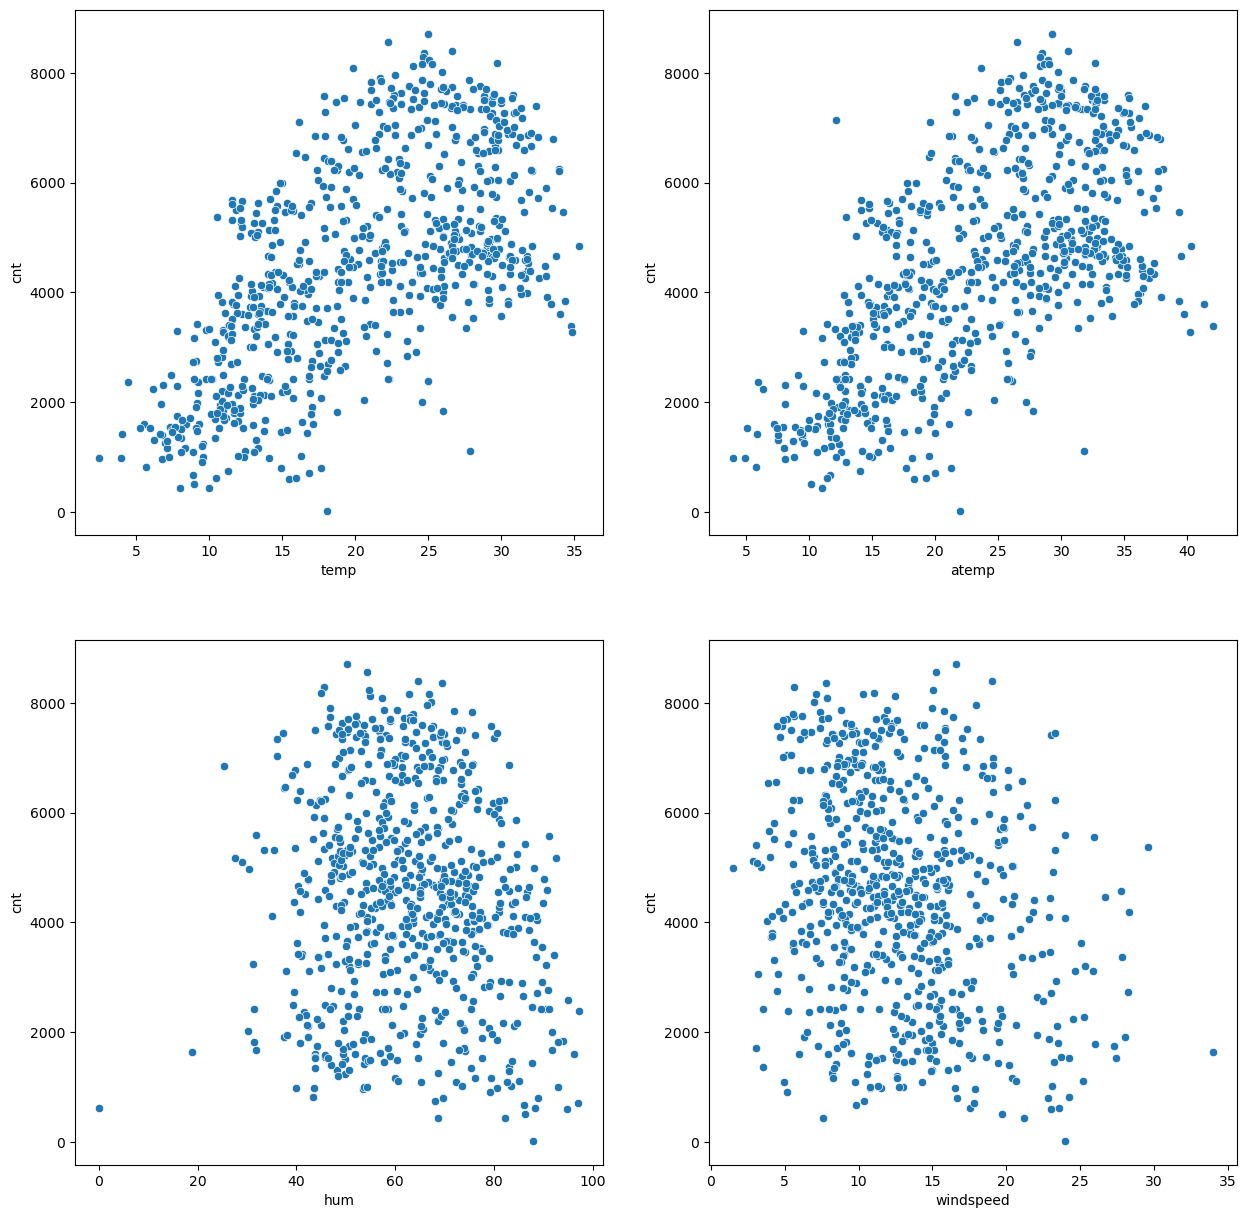

In [18]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.scatterplot(x = 'temp', y = 'cnt', data = bikes)
plt.subplot(2,2,2)
sns.scatterplot(x = 'atemp', y = 'cnt', data = bikes)
plt.subplot(2,2,3)
sns.scatterplot(x = 'hum', y = 'cnt', data = bikes)
plt.subplot(2,2,4)
sns.scatterplot(x = 'windspeed', y = 'cnt', data = bikes)
plt.show()

### Insights
* Target Variable **cnt** is postively correlated with *temp* variable.
* Target Variable **cnt** is postively correlated with *atemp* variable.
* Target Variable **cnt** is negatively correlated with *windspeed* variable.

### Visualising Categorical Variables

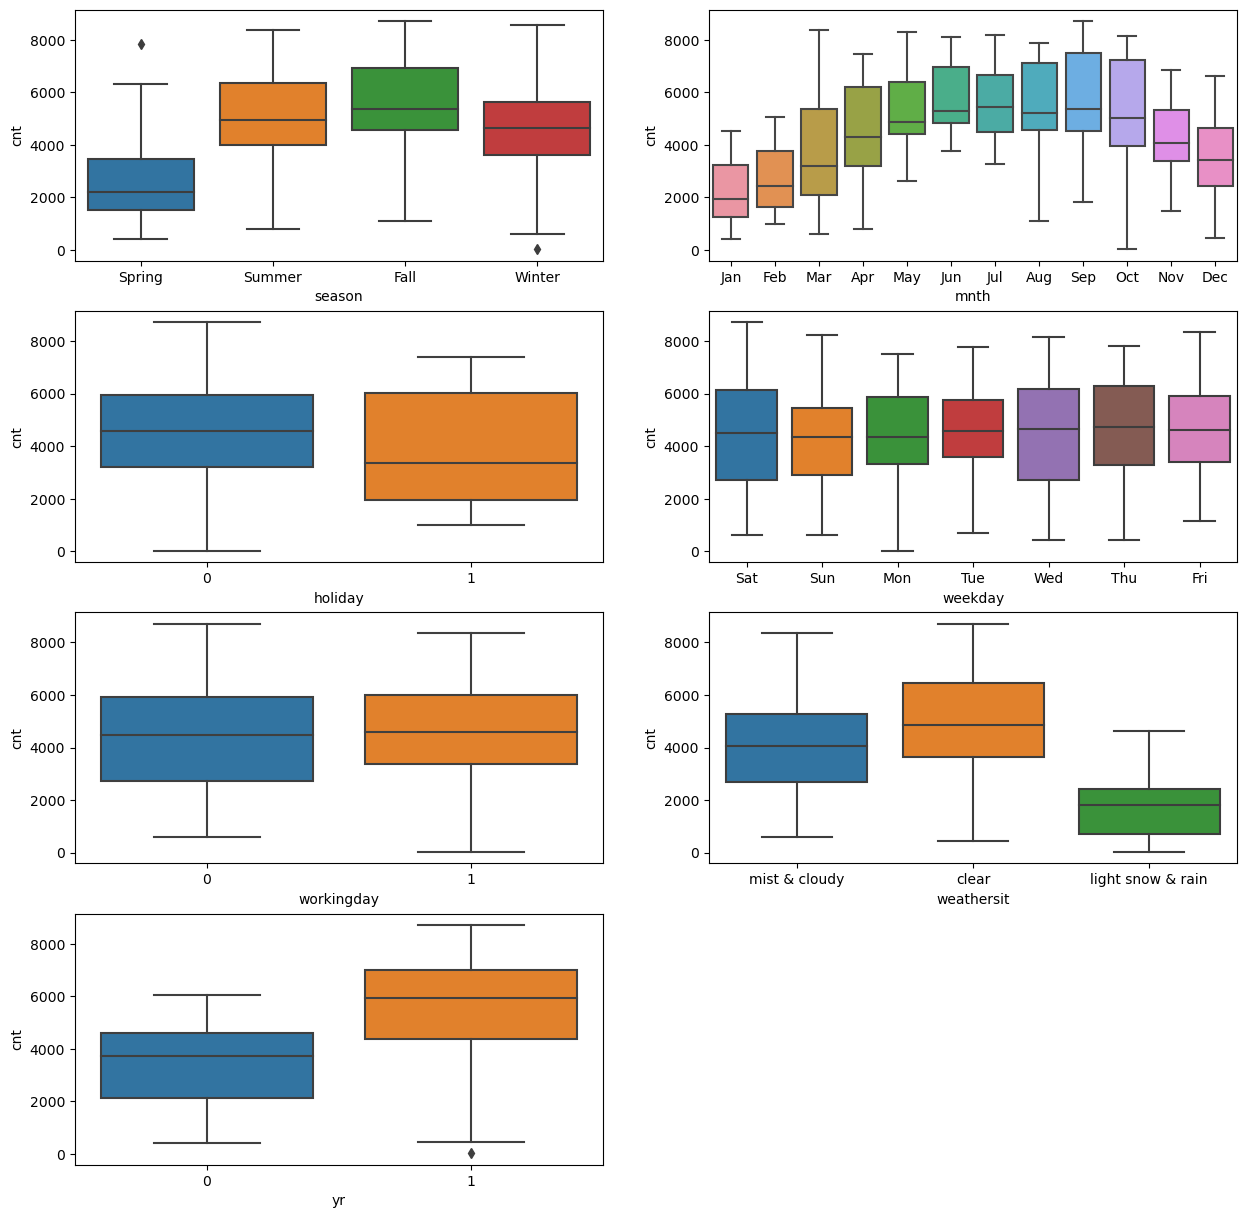

In [20]:
plt.figure(figsize=(15, 15))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(4,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(4,2,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(4,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(4,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(4,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(4,2,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.show()

### Insights
* The target variable is **dropping** in the spring season.
* The fall season has **more** rented bikes
* The rented bikes **increasing** in the months of **May to September** with some drop in the month of November & December.
* Majority of Bikes rented in the months of **June to September**
* Majority of Bikes rented when there is **No Holiday**
* Slight variation in bikes getting rented all days.
* Bikes are rented **more** when there is **clear weather** and slighly less when there is mist and cloudy.
* Bikes are **not rented** when there is **heavy rain**, *thunderstorms and falling of ice pallets*.
* Bikes are rented **more** in year **2019** compared to 2018

### Dummy Variables
Create dummy variables for all categorical variables where no. of categorie > 2 (no. of dummy variables = n-1)
* The variables 'season , 'mnth , 'weekday' , 'weathersit' has multiple levels (more than 2). We need to convert these levels into integer.

In [22]:
season_dummy = pd.get_dummies(bikes['season'], dtype=int)

In [23]:
season_dummy.head()

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


We can drop the Fall column, as the type of season can be identified with just the last three columns where:
* 000 will correspond to fall
* 100 will correspond to spring
* 010 will correspond to summer
* 001 will correspond to winter

In [25]:
# Drop the first column 
season_dummy = pd.get_dummies(bikes['season'], drop_first = True, dtype=int)

In [26]:
season_dummy.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [27]:
# dummy variables for the feature 'mnth' and dropping 1st column.
mnth_dummy = pd.get_dummies(bikes['mnth'], drop_first = True, dtype=int)

In [28]:
mnth_dummy.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [29]:
# dummy variables for the feature 'weekday' and dropping 1st column.
weekday_dummy = pd.get_dummies(bikes['weekday'], drop_first = True, dtype=int)

In [30]:
weekday_dummy.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [31]:
# dummy variables for the feature 'weathersit' and dropping 1st column.
weathersit_dummy = pd.get_dummies(bikes['weathersit'], drop_first = True, dtype=int)

In [32]:
weathersit_dummy.head()

,light snow & rain,mist & cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [33]:
# Add the all dummy variables datasets to the original bike dataframe
bikes = pd.concat([bikes, season_dummy, mnth_dummy, weekday_dummy, weathersit_dummy ], axis = 1)

In [34]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light snow & rain,mist & cloudy
0,Spring,0,Jan,0,Sat,0,mist & cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,Spring,0,Jan,0,Sun,0,mist & cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,Spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,Spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [35]:
bikes.shape

(730, 34)

In [36]:
# Drop 'season' , 'mnth' , 'weekday' , 'weathersit' as we have created the dummies for it
bikes.drop(['season' , 'mnth' , 'weekday' , 'weathersit'], axis = 1, inplace = True)

In [38]:
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light snow & rain,mist & cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   atemp              730 non-null    float64
 5   hum                730 non-null    float64
 6   windspeed          730 non-null    float64
 7   cnt                730 non-null    int64  
 8   Spring             730 non-null    int64  
 9   Summer             730 non-null    int64  
 10  Winter             730 non-null    int64  
 11  Aug                730 non-null    int64  
 12  Dec                730 non-null    int64  
 13  Feb                730 non-null    int64  
 14  Jan                730 non-null    int64  
 15  Jul                730 non-null    int64  
 16  Jun                730 non

In [37]:
bikes.shape

(730, 30)

### Insights
* After adding the all dummy variable in the Bike dateset, now we have 730 rows and **30** columns

## Step 3: EDA - Exploratory Data Analysis
* Univariate Analysis
* Bivariate Analysis
* Multivariate Analysis

In [40]:
num_cols=["temp","atemp","hum","windspeed","cnt"]
cat_cols=["yr","holiday","workingday","Spring","Summer","Winter","Aug","Dec","Feb","Jan","Jul","Jun","Mar",
          "May","Nov","Oct","Sep","Mon","Sat","Sun","Thu","Tue","Wed","light snow & rain","mist & cloudy"]
len(num_cols)+len(cat_cols)

30

### Univariate Analysis
* Univariate Analysis --> Analysis with Single variable 
   - Mean, Median, max, min, std, count etc
   - Distribution - Histogram, Distplot, Countplot, boxplot

#### Numerical Columns

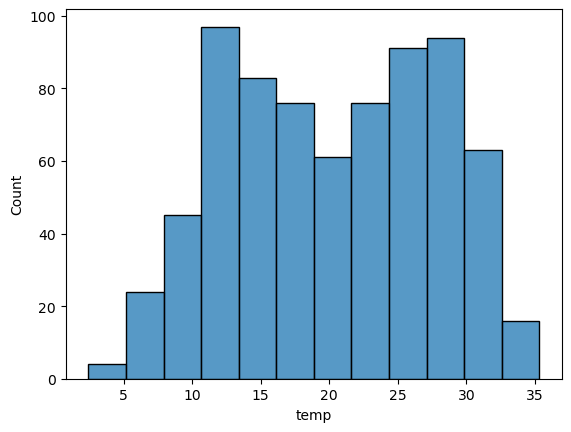

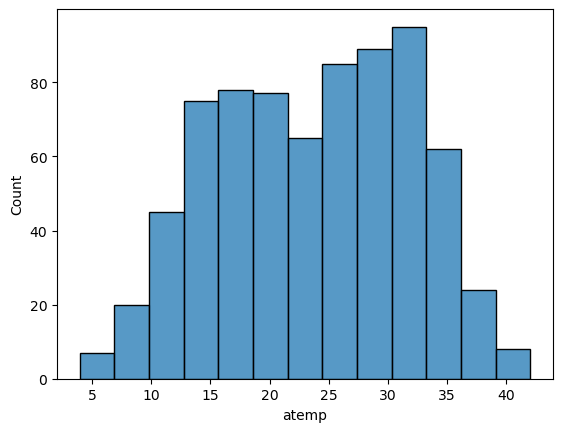

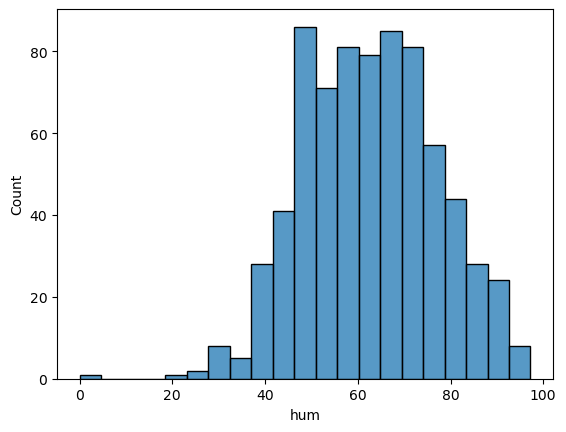

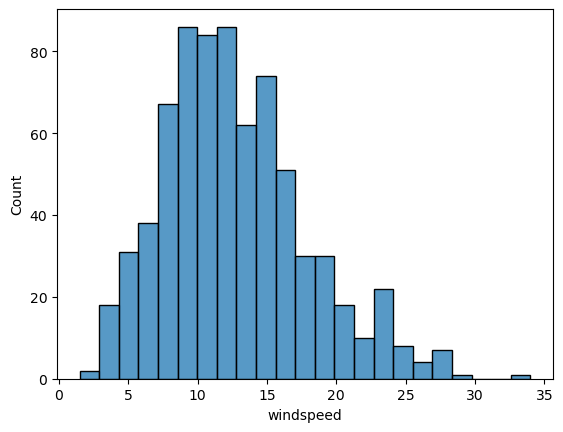

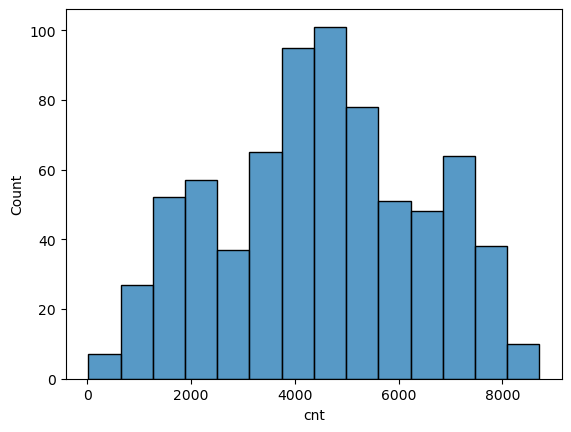

In [42]:
for i in num_cols:
    sns.histplot(x=bikes[i])
    plt.show()

### Insights
* Bike rented more when **temparature** range from 10 to 30 Celsius with slightly drop when temparature is +-20 Celsius
* Bike rented more when **feeling temparature** range from 10 to 35 Celsius with slightly drop when temparature is 22 to 24 Celsius
* Bike rented more when **humidity** range from 40 to 80 
* Bike rented more when **wind speed** range from 7 to 17

#### Categorical Columns

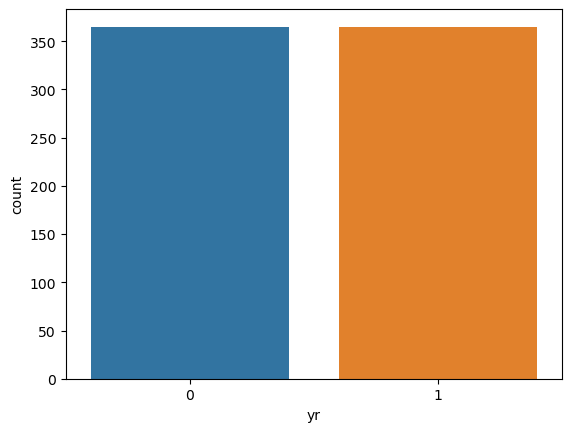

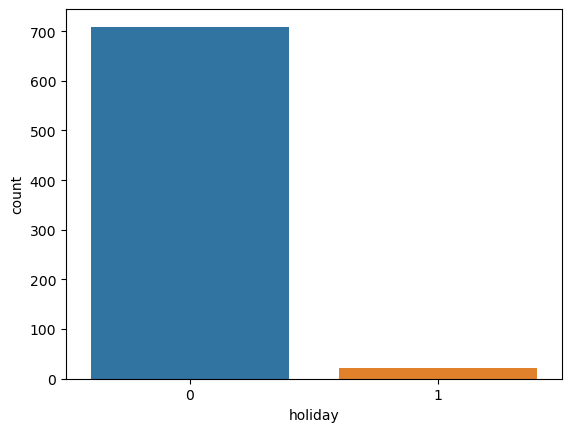

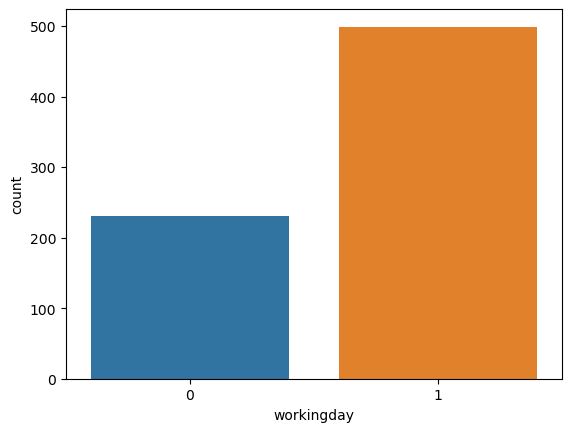

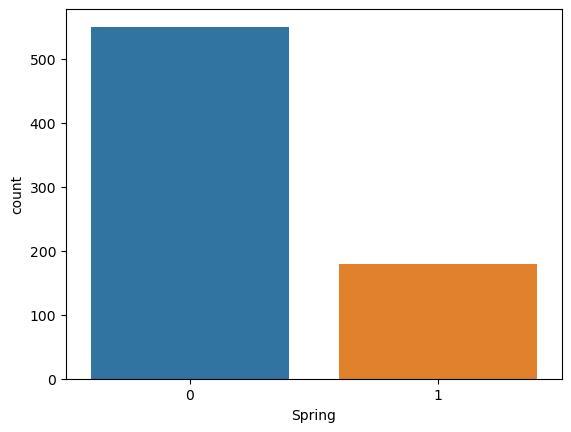

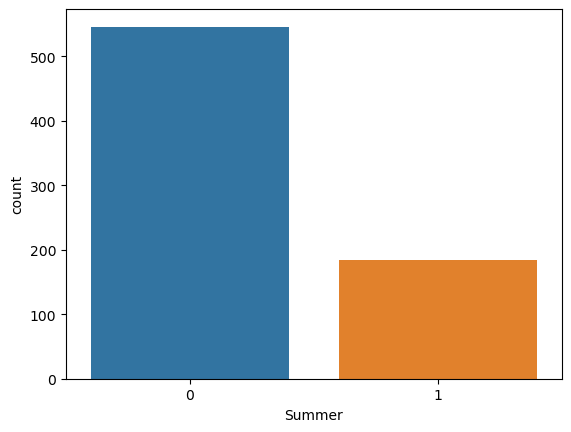

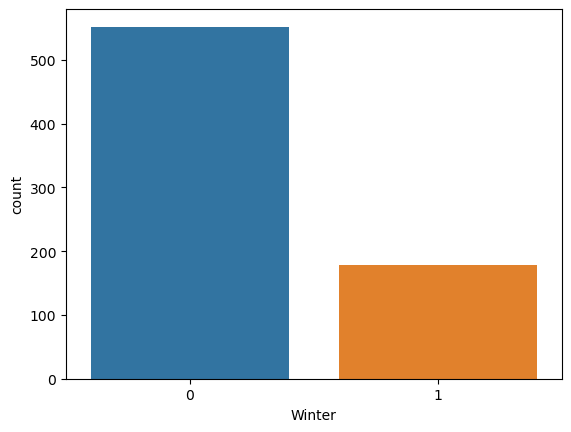

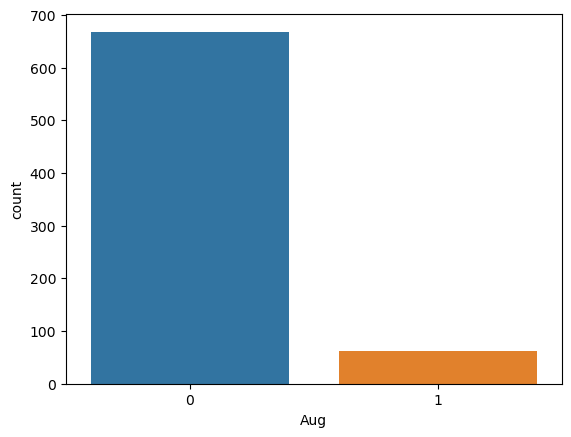

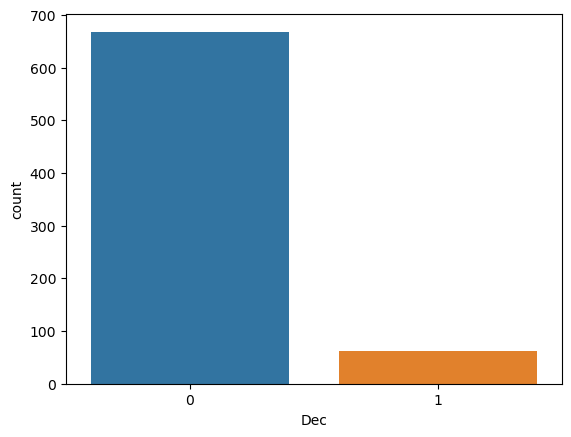

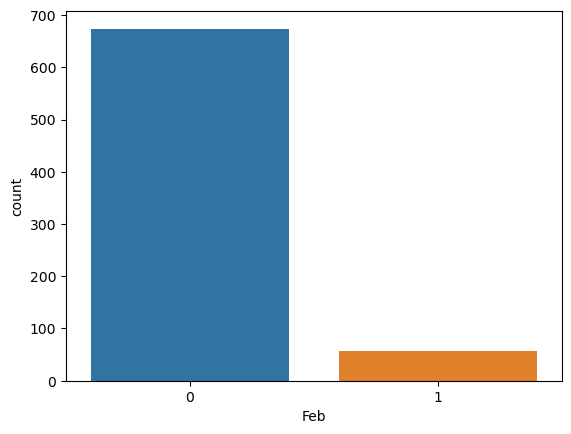

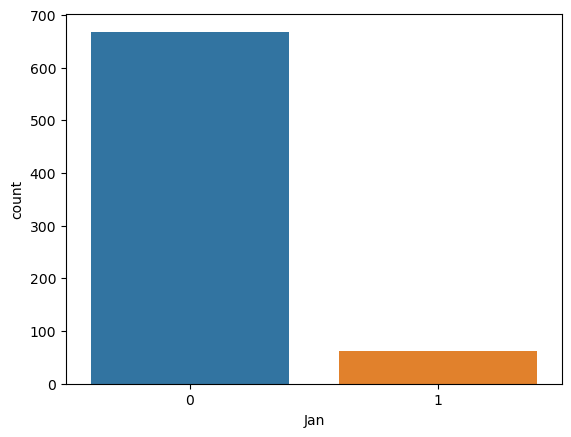

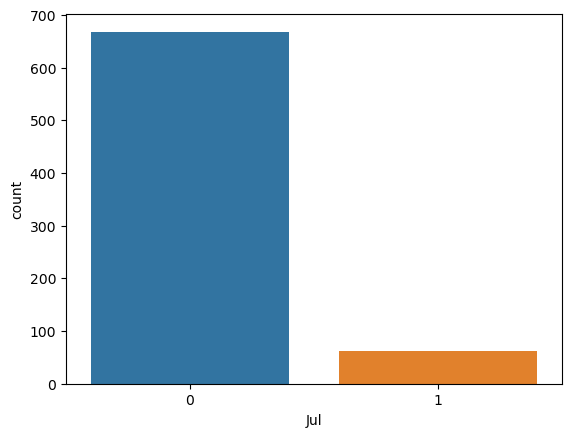

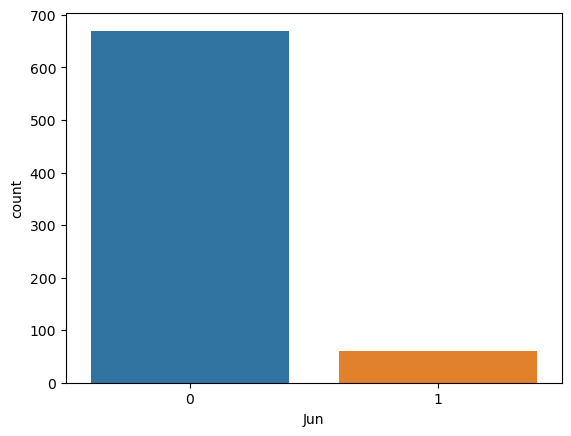

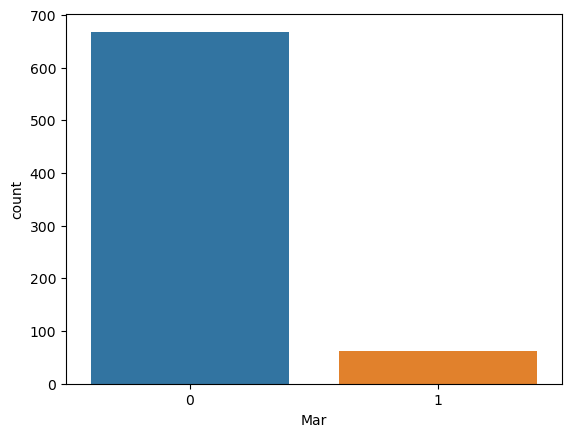

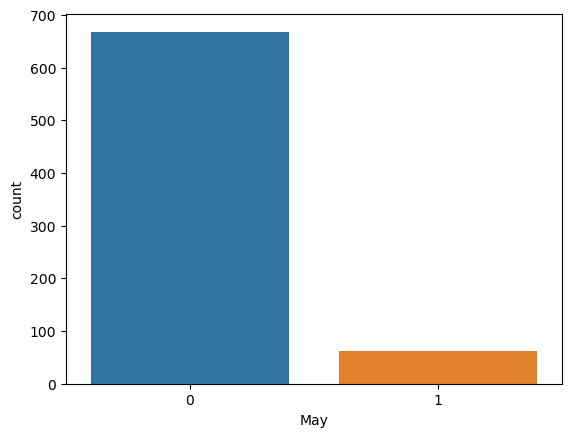

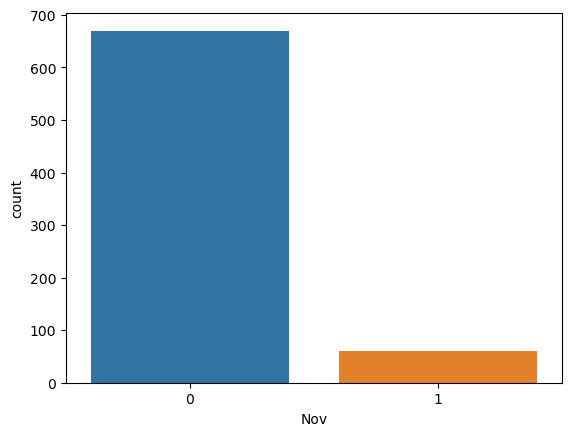

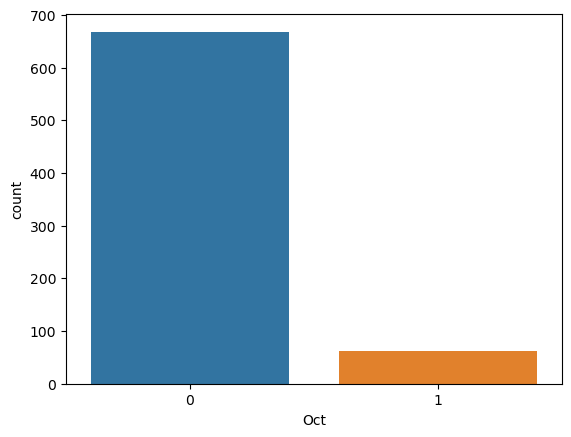

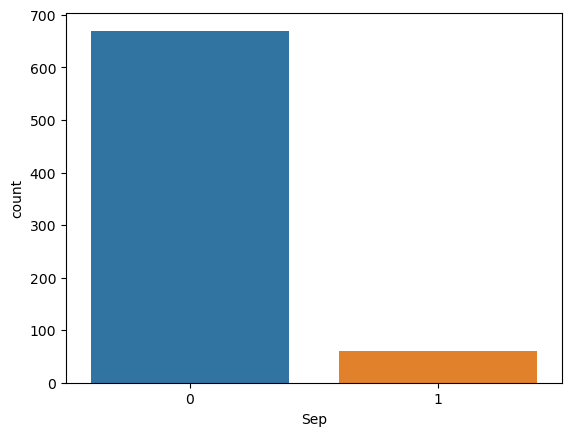

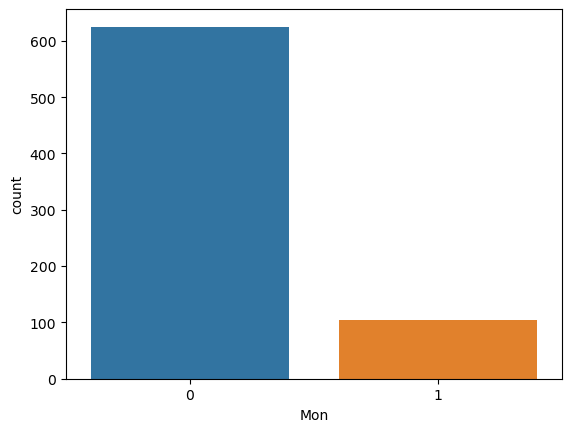

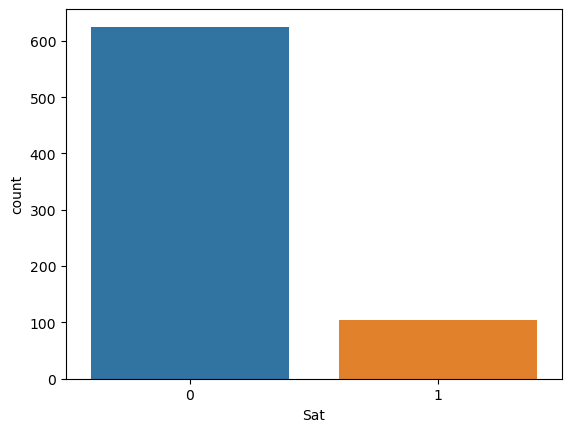

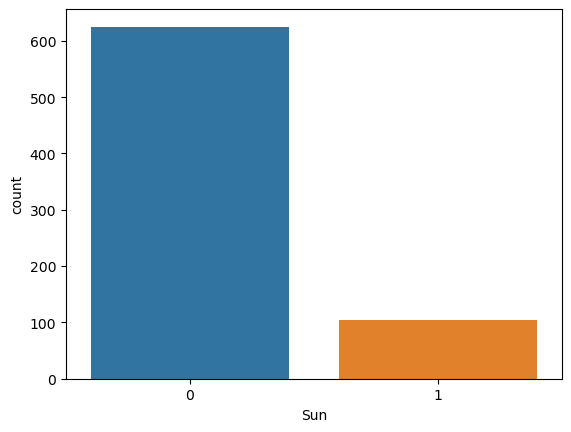

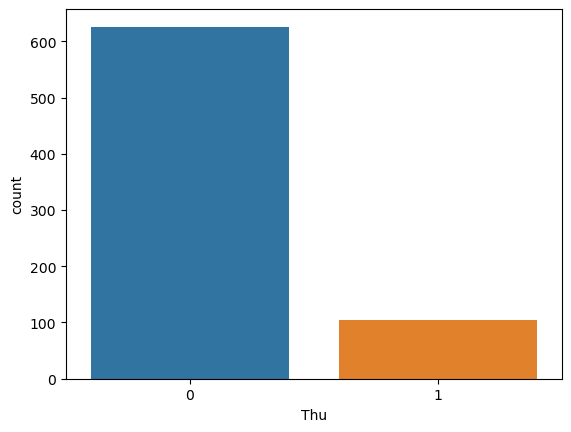

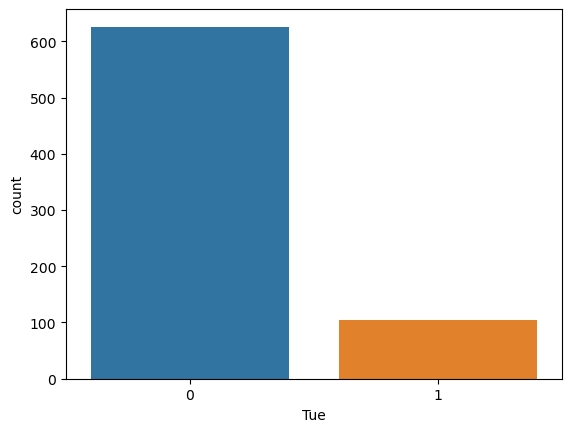

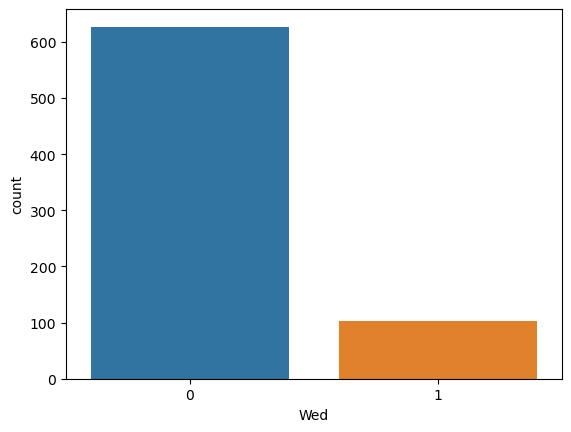

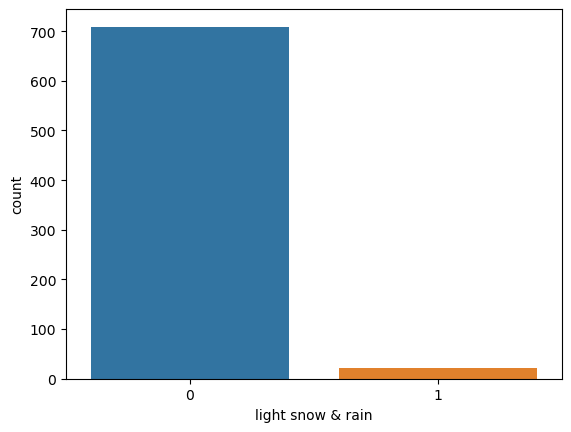

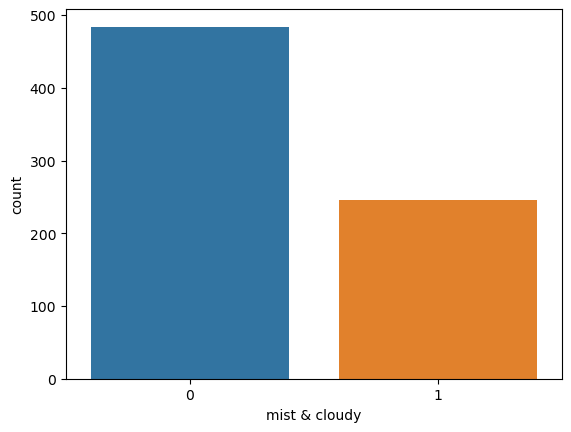

In [43]:
for i in cat_cols:
    sns.countplot(x=bikes[i])
    plt.show()

### Insights
* Bike rented more when there is no holiday
* Bike rented less in Spring season

### Bivariate Analysis
* Analysis with two variables Relationship with two variables - Scatterplot, boxplot, barplot etc

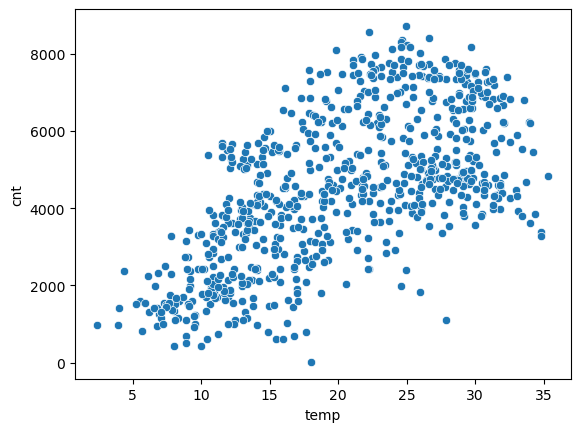

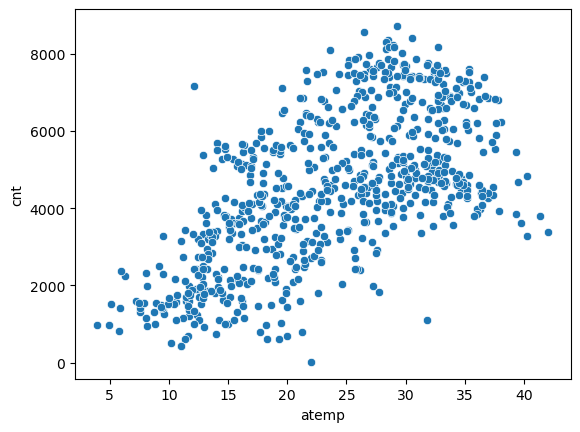

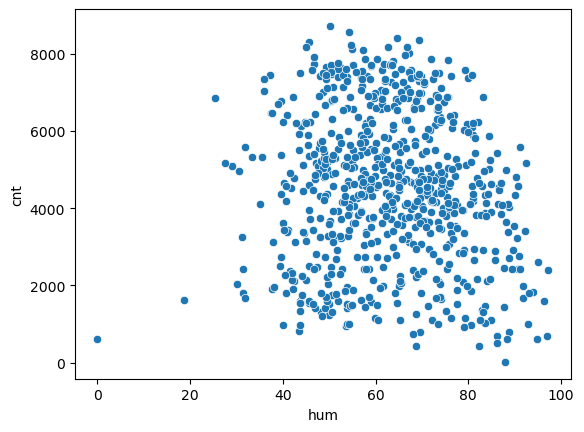

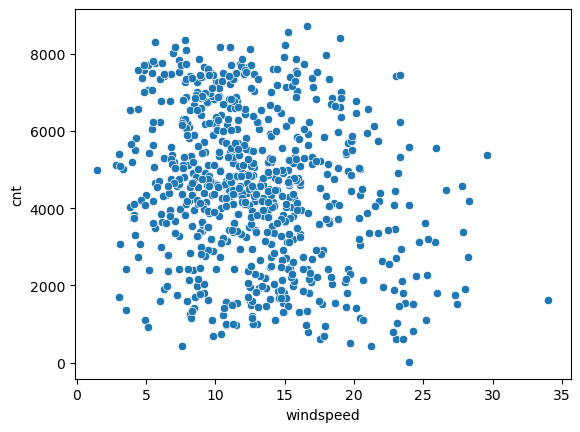

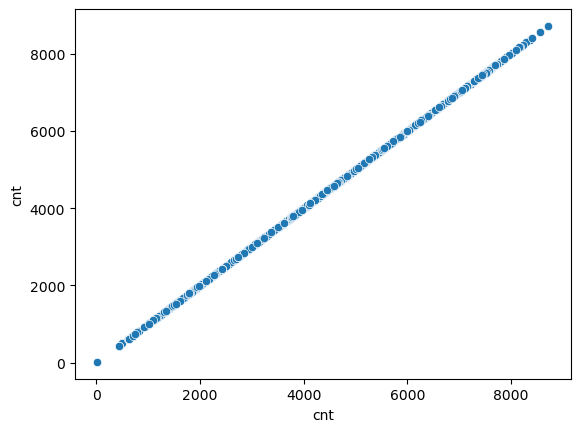

In [45]:
for i in num_cols:
    sns.scatterplot(x=bikes[i],y=bikes["cnt"])
    plt.show()

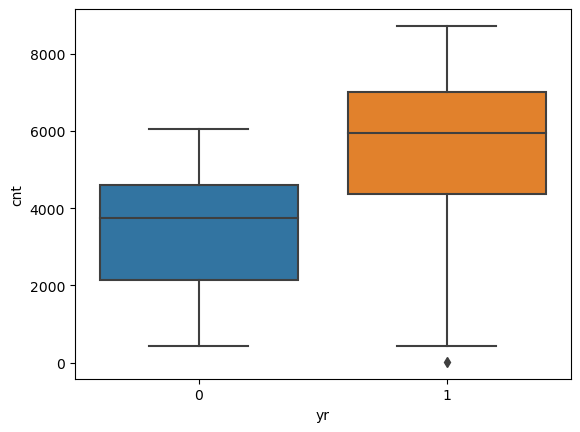

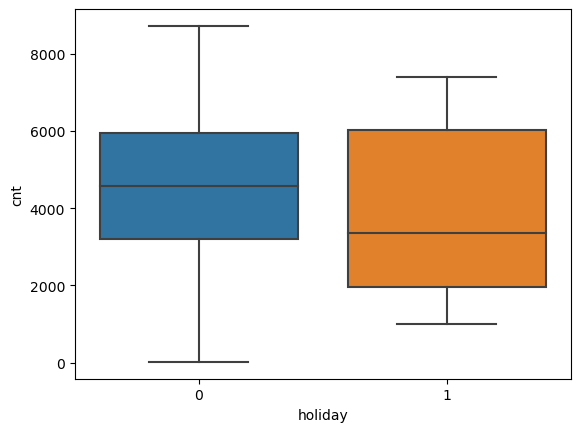

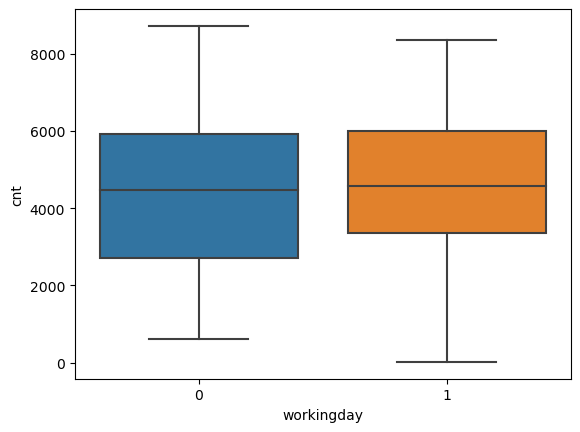

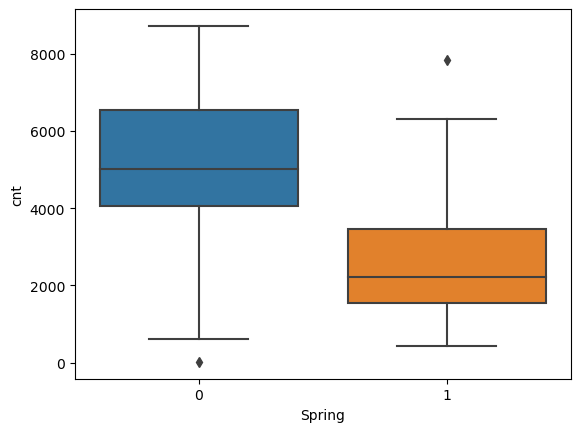

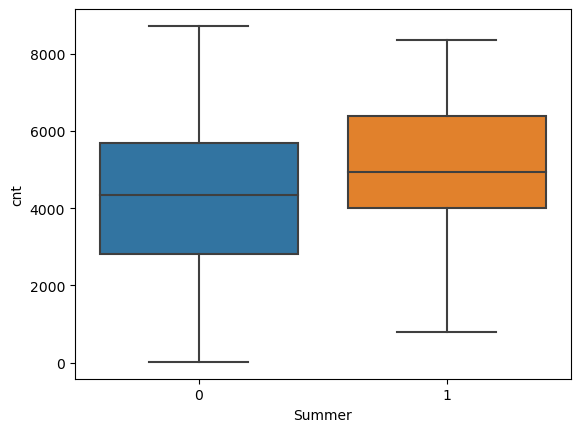

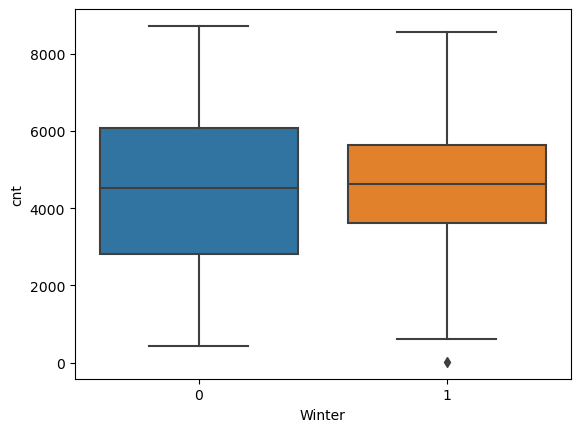

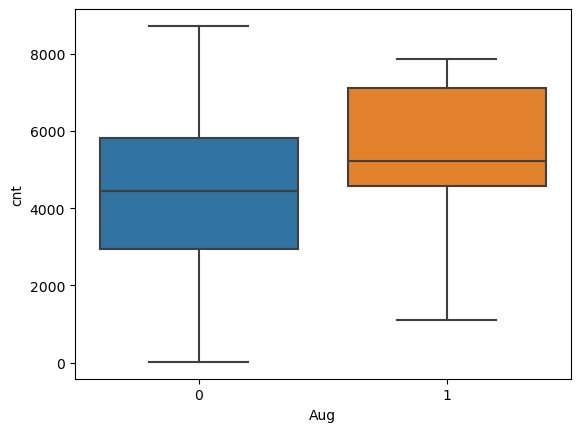

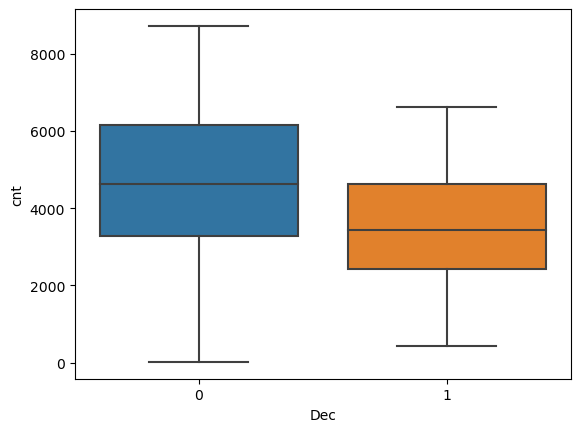

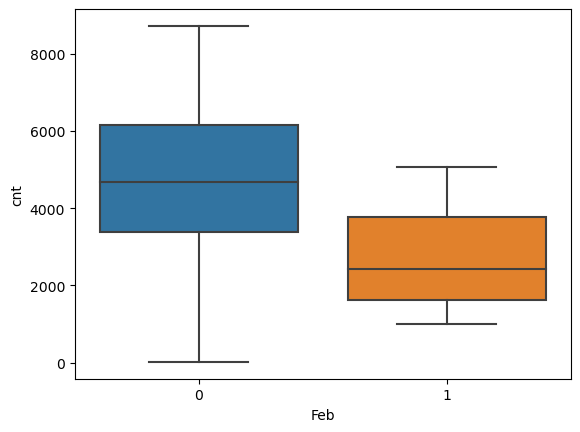

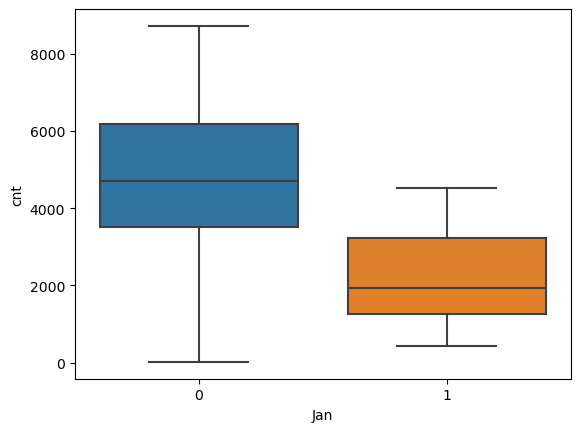

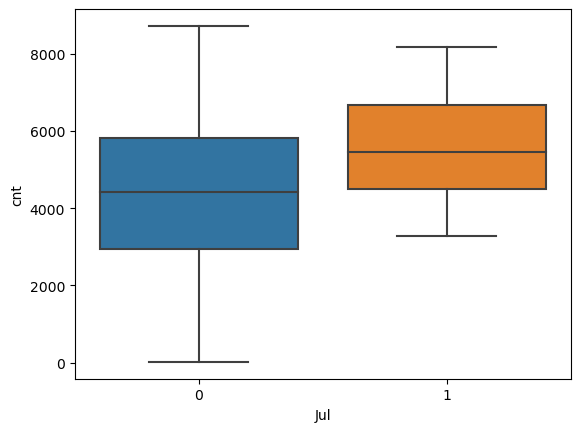

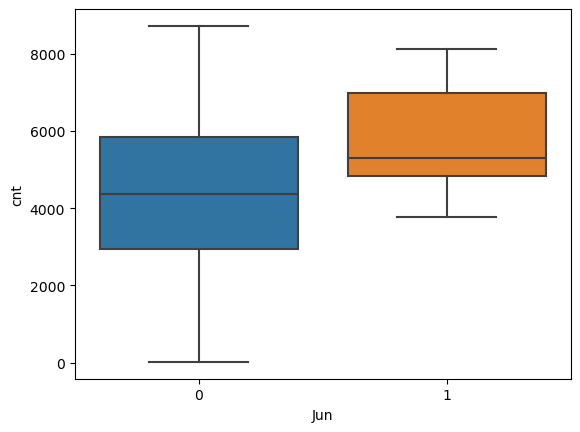

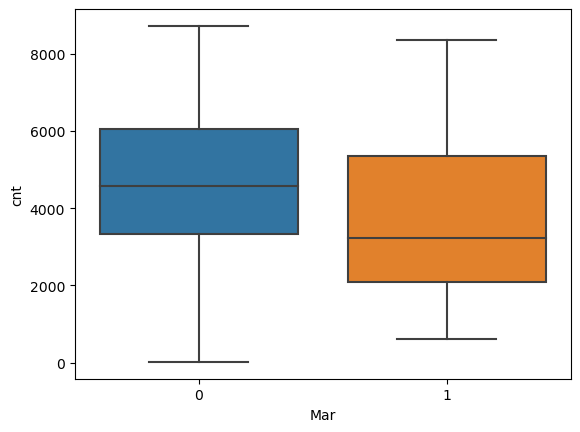

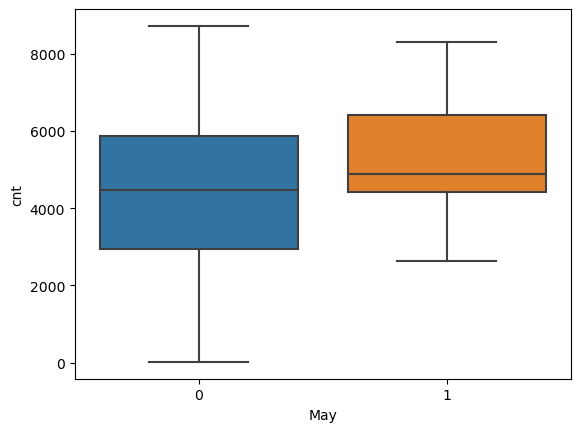

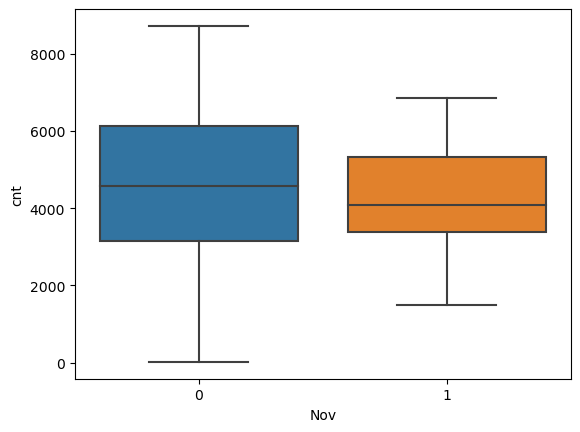

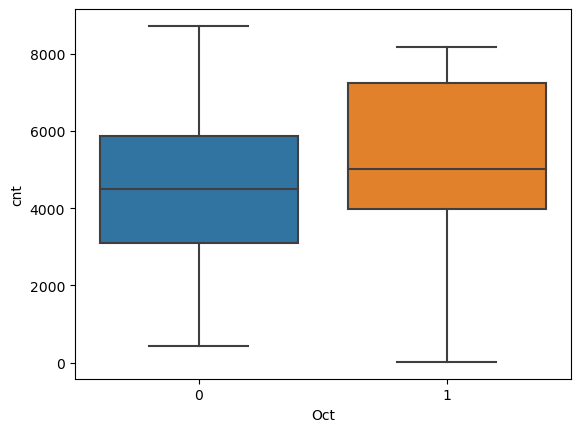

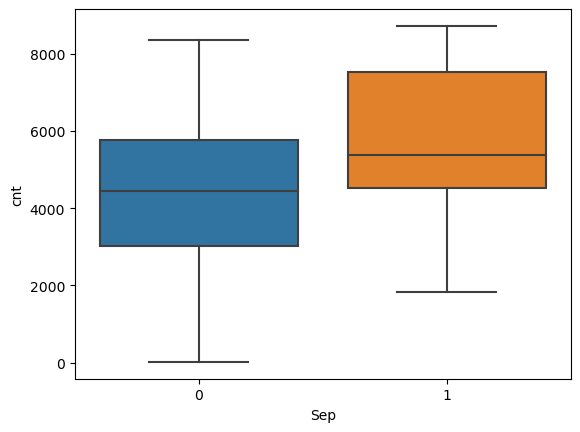

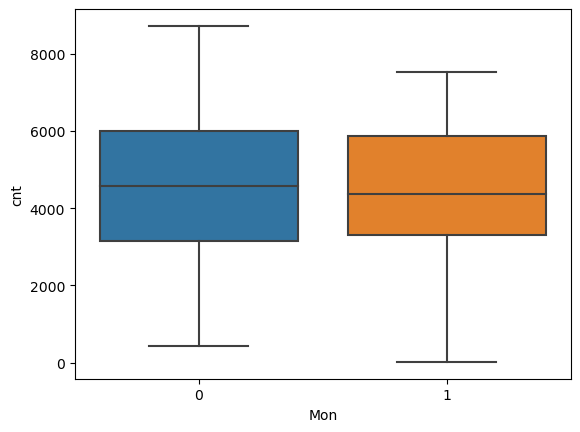

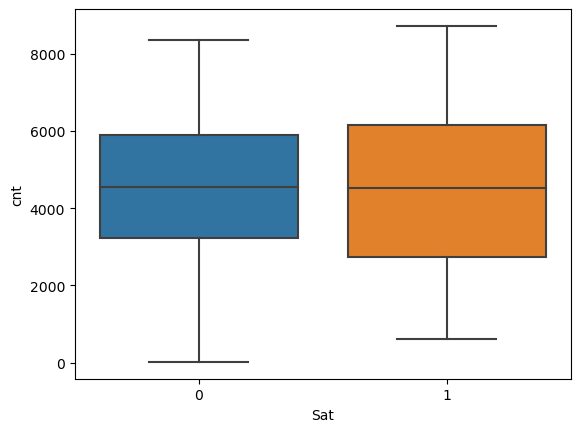

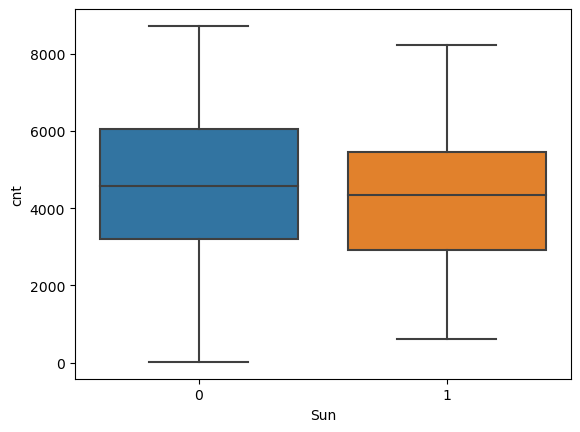

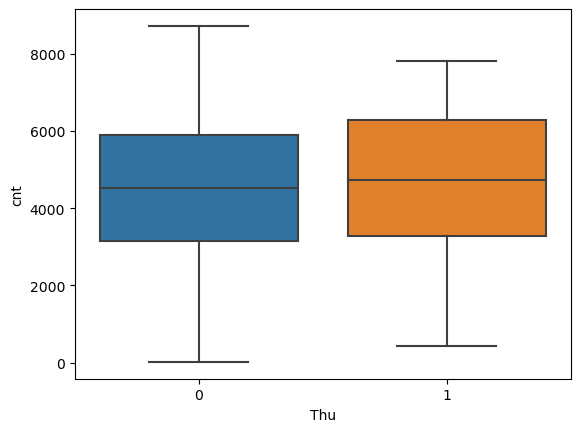

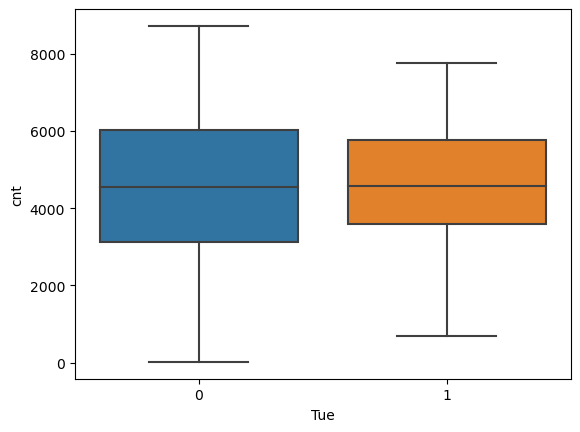

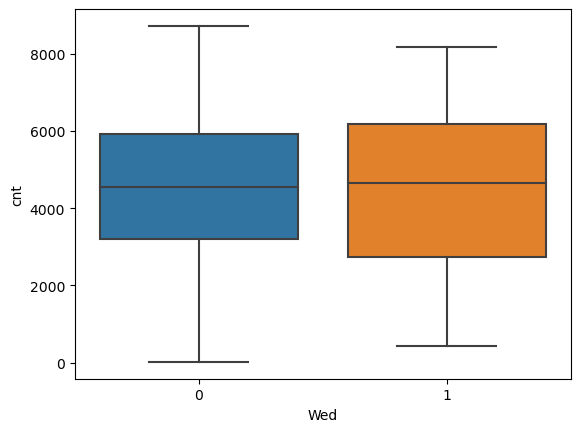

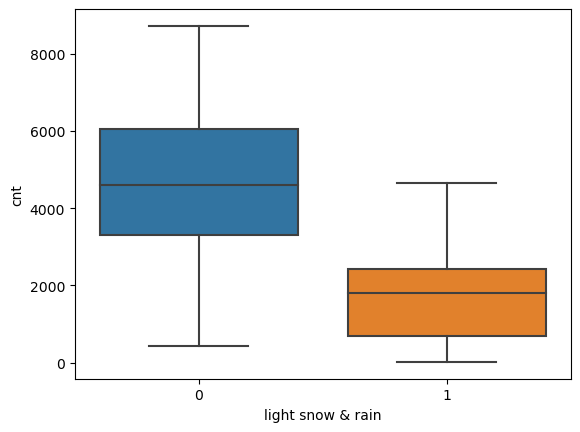

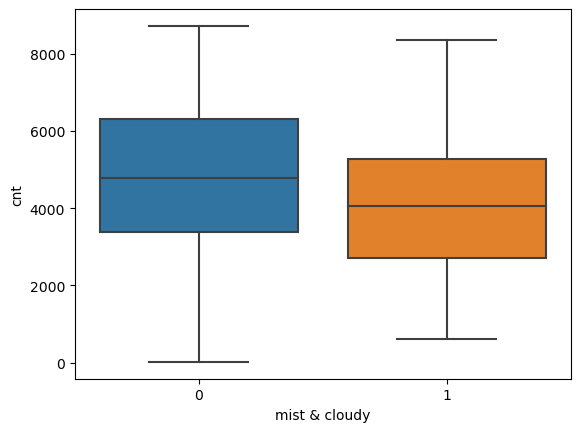

In [46]:
for i in cat_cols:
    sns.boxplot(x=bikes[i],y=bikes["cnt"])
    plt.show()

### Insights
* Bikes are rented more in year 2019 compared to 2018
* Bikes are rented more when there is no holiday
* Bikes are rented more in Summer
* Bikes are rented more in Aug, Jul, Jun, May, Oct and Sep 
* Bikes are rented more in Thus and Wednesday

### Multivariate Analysis
* Heatmap

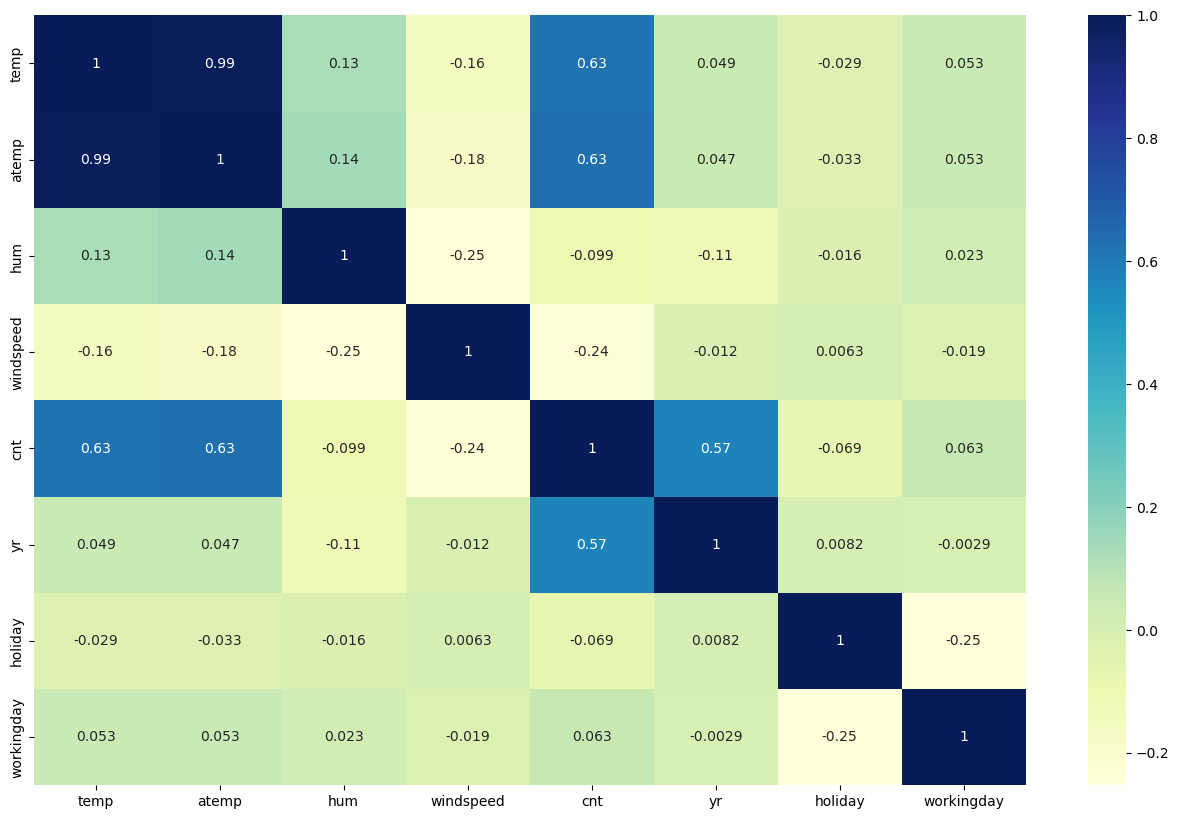

In [53]:
num_cols1=["temp","atemp","hum","windspeed","cnt","yr","holiday","workingday"]
plt.figure(figsize=(16,10))
sns.heatmap(bikes[num_cols1].corr(),annot=True, cmap = "YlGnBu")
plt.show()

### Insights
* Target Variable **cnt** is highly positively correlated with predictor variable **temp**, **atemp**, **and**, **yr**
* Target Variable **cnt** is negatively correlated with predictor variable **windspeed**
* Predictor Variable **temp** and **atemp** are highly correlated with each other which shows the case of multicollinearity.

In [54]:
# We observed that temp and atemp are highly correlated which is not desirable, hence dropping variable atemp.
bikes.drop(['atemp'],axis = 1, inplace = True)

In [55]:
bikes.shape

(730, 29)

## Step 4: Train Test Split

In [66]:
bikes_train,bikes_test = train_test_split(bikes,train_size=0.7,random_state=100)
print(bikes_train.shape)
print(bikes_test.shape)

(510, 29)
(220, 29)


## Step 5: Rescalling the Features
There are two common ways of rescalling:
* Min-Max scalling (normalisatio): Betwwen 0 and 1
* Standardisation (mean-0, sigma-1)

In [67]:
# Normalization of continuous variables
numerical_scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed']

numerical_scaler.fit(bikes_train[num_vars])
bikes_train[num_vars] = numerical_scaler.transform(bikes_train[num_vars])

### X_train , y_train

In [68]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

In [69]:
y_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

In [70]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light snow & rain,mist & cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [71]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'light snow & rain', 'mist & cloudy'],
      dtype='object')

## Step 6: Feature Selection

* Hybrid (Automated + Mannual)
* 15 Best columns are chosen using RFE
* Then p-value method is followed for further elimination.

#### Recursive Feature Elimination

In [72]:
lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [73]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
21,1,True,Sat
19,1,True,Sep
26,1,True,light snow & rain
12,1,True,Jan
8,1,True,Winter
7,1,True,Summer
13,1,True,Jul
5,1,True,windspeed
1,1,True,holiday


In [74]:
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['yr', 'Sat', 'Sep', 'light snow & rain', 'Jan', 'Winter', 'Summer',
       'Jul', 'windspeed', 'holiday', 'workingday', 'Spring', 'temp',
       'mist & cloudy', 'hum'], dtype=object)

#### Manual Elimination

In [75]:
def ols_fit(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model
def vif(X) : 
    df = sm.add_constant(X)
    vif = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif_frame = pd.DataFrame({'vif' : vif[0:]},index = df.columns).reset_index()
    print(vif_frame.sort_values(by='vif',ascending=False))

## Step 7: Model Building

#### Model 1

In [78]:
features_1 = selected_features
ols_fit(y_train,X_train[features_1])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.4
Date:                Tue, 28 May 2024   Prob (F-statistic):          3.01e-191
Time:                        10:04:17   Log-Likelihood:                -4108.5
No. Observations:                 510   AIC:                             8247.
Df Residuals:                     495   BIC:                             8311.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2132.0367    313.19

#### Model 2 :
* Dropping **jan** because of high p-value

In [79]:
del_feature = 'Jan'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Tue, 28 May 2024   Prob (F-statistic):          1.54e-191
Time:                        10:04:32   Log-Likelihood:                -4110.6
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     496   BIC:                             8309.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2026.8932    309.79

#### Model 3:
* Dropping **Spring** because of high p-value

In [80]:
del_feature = 'Spring'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Tue, 28 May 2024   Prob (F-statistic):          4.14e-191
Time:                        10:08:57   Log-Likelihood:                -4114.5
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     497   BIC:                             8310.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1510.4502    247.48

#### Model 4:
* Dropping **Jul** because of high p-value

In [82]:
del_feature = 'Jul'
selected_features = selected_features[selected_features!=del_feature]
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Tue, 28 May 2024   Prob (F-statistic):          5.10e-191
Time:                        10:11:15   Log-Likelihood:                -4117.5
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     498   BIC:                             8310.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1504.3386    248.71

### Checking VIF 
- For Verifying MultiCollinearity

In [83]:
vif(X_train[selected_features])

                index        vif
0               const  51.106843
11                hum   1.867536
8          workingday   1.651214
2                 Sat   1.641290
10      mist & cloudy   1.557080
9                temp   1.270660
5              Winter   1.254979
4   light snow & rain   1.239418
6              Summer   1.191625
7           windspeed   1.181038
3                 Sep   1.111498
1                  yr   1.028505


### Insights
* VIF < 5 for selected features.
* No significant multicollinearity observed.

### Final Model

In [84]:
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Tue, 28 May 2024   Prob (F-statistic):          5.10e-191
Time:                        10:22:39   Log-Likelihood:                -4117.5
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     498   BIC:                             8310.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1504.3386    248.71

### Insights
* 11 features have been selected.
* All the features are statistically significant [low p-value]
* The model over is a good fit with Prob (F-statistic): 5.10e-191
* The model explains **84.1%** variability in the training data. Adjusted R-square being **83.8%**

#### Residual Analysis

Text(0.5, 0, 'Errors')

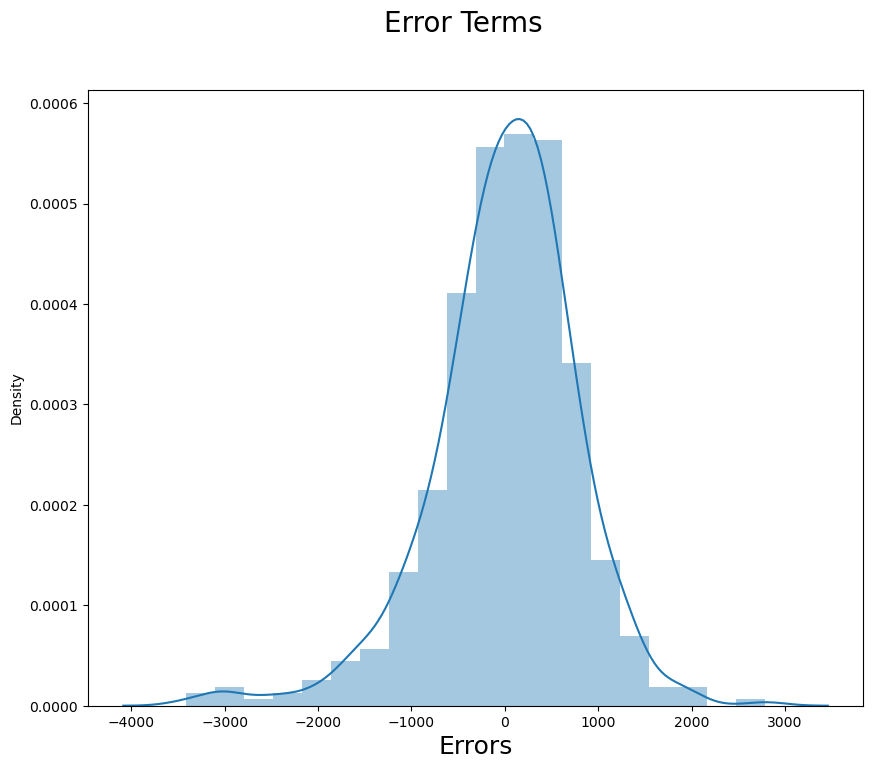

In [94]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[selected_features])

y_train_pred = final_model.predict(X_train_sm)


# Plot the histogram of the error terms
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [95]:
# Mean of Residuals
(y_train-y_train_pred).mean()

5.777966340675073e-12

## Step 8: Model Evaluation

* Let's Find out the R-Square of Final Model on Train Dataset and Test Dataset respectively

#### Prediction

In [98]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test
X_test[num_vars] = numerical_scaler.transform(X_test[num_vars])
X_test = X_test[selected_features]

In [99]:
X_test = sm.add_constant(X_test)
y_test_pred = final_model.predict(X_test)

In [103]:
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared of Final Model for Train Data:',round(rsquared_train,2))
print('R-squared of Final Model for Test Data:',round(rsquared_test,2))

R-squared of Final Model for Train Data: 0.84
R-squared of Final Model for Test Data: 0.81


Text(0, 0.5, 'y_test_pred')

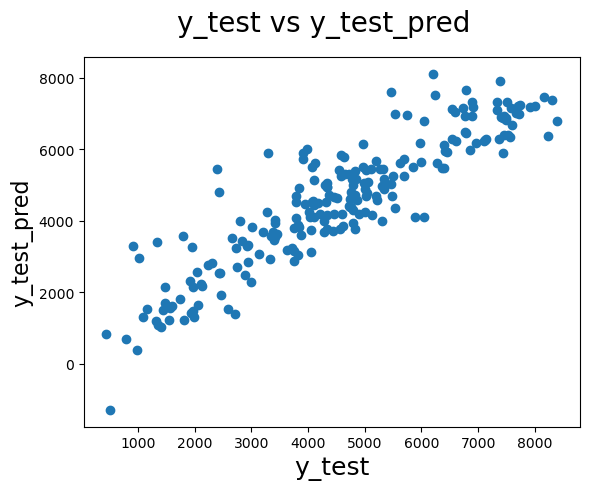

In [104]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

In [105]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Tue, 28 May 2024   Prob (F-statistic):          5.10e-191
Time:                        11:03:53   Log-Likelihood:                -4117.5
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     498   BIC:                             8310.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1504.3386    248.714      6.048      0.000    1015.681    1992.996
yr                 1994.3229     70.574     28.258      0.000    1855.663    2132.983
Sat                 546.0685    123.189      4.433      0.000     304.035     788.102
Sep                 892.9024    134.898      6.619      0.000     627.863    1157.942
light snow & rain -2108.3253    229.240     -9.197      0.000   -2558.723   -1657.928
Winter             1213.5752     90.364     13.430      0.000    1036.033    1391.118
Summer              791.0644     88.054      8.984      0.000     618.061     964.068
windspeed         -1619.9445    222.880     -7.268      0.000   -2057.846   -1182.043
workingday          463.3989     95.561      4.849      0.000     275.647     651.151
temp               4963.5080    173.806     28.558      0.000    4622.024    5304.992
mist & cloudy      -467.9029     91.318     -5.124      0.000    -647.319    -288.487
hum               -1416.1909    326.306     -4.340      0.000   -2057.298    -775.084
==============================================================================
Omnibus:                       72.400   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.721
Skew:                          -0.755   Prob(JB):                     1.03e-36
Kurtosis:                       5.349   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The equation of our best fitted line is:
    
**cnt = 1504.33 + 1994.32xyr + 546.07xSat + 892.90xSep - 2108.32xlight snow & rain + 1213.57xWinter + 
791.06xSummer - 1619.95xwindspeed + 463.39xworkingday + 4963.50xtemp - 467.90xmist & cloudy - 1416.19xhum**

## Conclusion
As per our final Model, the top 3 predictor variables that influences the bike booking are:

* **temp** :- A coefficient value of '4963.50' indicates that a unit increase in temp variable increases the bike hire numbers by 4963.50 units.
* **yr**:- A coefficient value of '1994.32' indicates that a unit increase in yr variable increases the bike hire numbers by 1994.32 units.
* **light snow and rain (lsr)**:- A coefficient value of '-2108.32' indicates that a unit increase in lsr variable decreases the bike hire numbers by 2108.32 units.